<a href="https://colab.research.google.com/github/SosisterRapStar/ETU-LETI-labs-sem-4-/blob/master/ddosdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devendra416/ddos-datasets")

print("Path to dataset files:", path)

100%|██████████| 2.68G/2.68G [00:42<00:00, 67.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/devendra416/ddos-datasets/versions/1


In [20]:
import numpy as np
import pandas as pd
import os
path = "/root/.cache/kagglehub/datasets/devendra416/ddos-datasets/versions/1/ddos_balanced/final_dataset.csv"

total_num_of_rows = sum(1 for _ in open(path))
rows_to_read = int(total_num_of_rows * 0.05)
first_part = pd.read_csv(path, nrows=rows_to_read)
rows_to_skip = int(total_num_of_rows * 0.95)
second_part = pd.read_csv(path, skiprows=range(1, rows_to_skip + 1))
df = pd.concat([first_part, second_part], ignore_index=True)


In [22]:
df

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279457,1725894,172.31.67.50-209.85.203.113-53598-80-6,209.85.203.113,80,172.31.67.50,53598,6,20/02/2018 05:14:52,50,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279458,5681778,172.31.69.17-108.174.10.14-54599-443-6,172.31.69.17,54599,108.174.10.14,443,6,20/02/2018 03:08:35,306,3,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279459,6395326,172.31.0.2-172.31.65.49-53-61087-17,172.31.65.49,61087,172.31.0.2,53,17,20/02/2018 01:03:19,362,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279460,4926899,172.31.0.2-172.31.67.58-53-61580-17,172.31.67.58,61580,172.31.0.2,53,17,20/02/2018 12:43:11,303,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [23]:
import seaborn as sn
import matplotlib.pyplot as plt


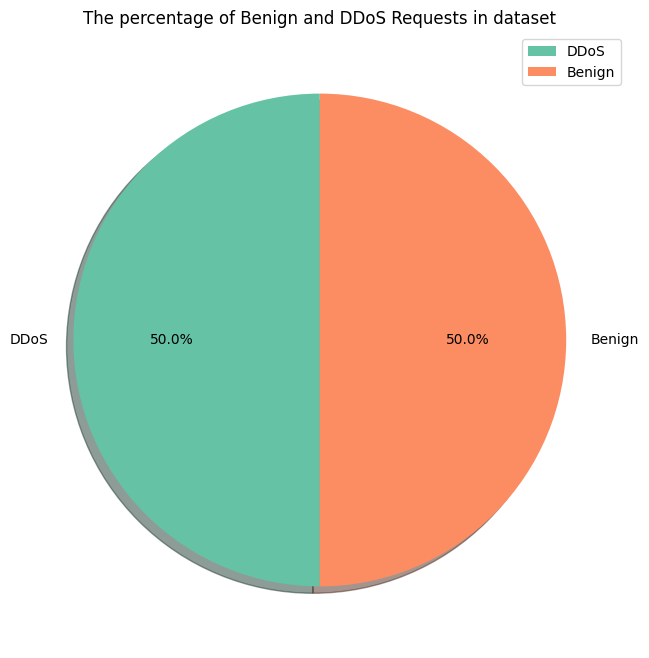

In [24]:
Label = ['DDoS','Benign']
num_of_ddos_classes = df['Label'].value_counts()['ddos']
num_of_benign_classes = df['Label'].value_counts()['Benign']
plt.figure(figsize = (13,8))
colors = sn.color_palette("Set2")
plt.pie([num_of_ddos_classes, num_of_benign_classes], labels=Label, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.legend(['DDoS', 'Benign'])
plt.title('The percentage of Benign and DDoS Requests in dataset')
plt.show()

In [25]:
colsToDrop = ['Src IP', 'Dst IP', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
                       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Flow ID', 'Timestamp', 'Unnamed: 0']

In [26]:
df.Label.value_counts()


,count
Label,
ddos,639731
Benign,639731


In [7]:
# for col in colsToDrop:
#   del df[col]

In [27]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [28]:
df = df.astype({'Label':'string'})

# Проверим наличие пропусков в датасете

В датасете нет пропусков

# Найдем столбцы столбцы с большим кол-во повторяющихся значений

In [29]:

rowbuilder = lambda col: {'col': col, 'unique_values': df[col].nunique(), 'most_frequent_value': df[col].value_counts().index[0],'frequency': df[col].value_counts(normalize=True).values[0]}
frequency = [rowbuilder(col) for col in df.columns]
skewed = pd.DataFrame(frequency)

skewed = skewed[skewed['frequency'] >= 0.95]
colsToDrop = np.union1d(colsToDrop, skewed['col'].values)


# Найдем столбцы с пропущенными значениями

In [30]:

del skewed
del rowbuilder
del frequency

missing = df.isna().sum()
missing = pd.DataFrame({'count': missing, '% of total': missing/len(df)*100}, index=df.columns)
missing
colsToDrop = np.union1d(colsToDrop, missing[missing['% of total'] >= 50].index.values)
dropnaCols = missing[(missing['% of total'] > 0) & (missing['% of total'] <= 5)].index.values

# Удалим столбцы с большим кол-во повторяющихся значений и с пропусками

In [31]:
dropnaCols = np.union1d(dropnaCols, ['Flow Byts/s', 'Flow Pkts/s'])
df.drop(columns=colsToDrop, inplace=True)
df.dropna(subset=dropnaCols, inplace=True)

print('After dropping some columns: \n\t there are {} columns and {} rows'.format(len(df.columns), len(df)))

After dropping some columns: 
	 there are 68 columns and 1276460 rows


# Удалим столбцы с бесконечными значениями


In [33]:
df

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4504,80,6,3974862,29,44,86.0,59811.0,86.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,4504,80,6,63,1,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,4505,80,6,476078,2,6,86.0,3037.0,86.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,4505,80,6,151,2,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,4506,80,6,472507,2,5,73.0,1050.0,73.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279457,80,53598,6,50,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279458,54599,443,6,306,3,0,46.0,0.0,46.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279459,61087,53,17,362,1,1,45.0,61.0,45.0,45.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1279460,61580,53,17,303,1,1,47.0,63.0,47.0,47.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [34]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Шаг 2: Находим строки с бесконечными значениями в числовых столбцах
rows_with_inf = df[np.isinf(df[numeric_columns]).any(axis=1)]

# Шаг 3: Собираем имена столбцов, содержащих бесконечные значения
inf_subset = set()
for index, row in rows_with_inf.iterrows():
    for column_name, value in row[numeric_columns].items():  # Только числовые столбцы
        if np.isinf(value):  # Проверяем, является ли значение бесконечностью
            inf_subset.add(column_name)

inf_subset = list(inf_subset)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=inf_subset, how="all", inplace=True)
rows_with_inf = df[np.isinf(df[numeric_columns]).any(axis=1)]


In [35]:
df.shape

(1274640, 68)

# Удалим возможные отрицательные значения


In [36]:
negValCols = ['Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min']
for col in negValCols:
    df = df[df[col] >= 0]

In [37]:
from sklearn.preprocessing import StandardScaler
Y = df.Label
df = df.drop(columns=['Label'])

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
df = pd.DataFrame(standardized_data, columns=df.columns)
df.head(10)


,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-2.438142,-0.29316,-0.440641,-0.175224,-0.030229,0.305586,-0.037097,0.313246,-0.250354,-0.339571,...,-0.035914,-0.815218,-0.078233,-0.060178,-0.085951,-0.063983,-0.249957,-0.111542,-0.256911,-0.238582
1,-2.438142,-0.29316,-0.440641,-0.324383,-0.036529,-0.032577,-0.037702,-0.018523,-0.621668,-0.339571,...,-0.036139,-0.815218,-0.078233,-0.060178,-0.085951,-0.063983,-0.249957,-0.111542,-0.256911,-0.238582
2,-2.438087,-0.29316,-0.440641,-0.306520,-0.036304,0.006744,-0.037097,-0.001677,-0.250354,-0.339571,...,-0.035914,-0.815218,-0.078233,-0.060178,-0.085951,-0.063983,-0.249957,-0.111542,-0.256911,-0.238582
3,-2.438087,-0.29316,-0.440641,-0.324380,-0.036304,-0.032577,-0.037702,-0.018523,-0.621668,-0.339571,...,-0.036139,-0.815218,-0.078233,-0.060178,-0.085951,-0.063983,-0.249957,-0.111542,-0.256911,-0.238582
4,-2.438032,-0.29316,-0.440641,-0.306654,-0.036304,-0.001120,-0.037189,-0.012699,-0.306483,-0.339571,...,-0.035914,-0.815218,-0.078233,-0.060178,-0.085951,-0.063983,-0.249957,-0.111542,-0.256911,-0.238582
5,-2.438032,-0.29316,-0.440641,-0.324380,-0.036529,-0.032577,-0.037702,-0.018523,-0.621668,-0.339571,...,-0.036139,-0.815218,-0.078233,-0.060178,-0.085951,-0.063983,-0.249957,-0.111542,-0.256911,-0.238582
6,-2.437978,-0.29316,-0.440641,-0.306763,-0.036304,-0.001120,-0.037217,-0.013586,-0.323753,-0.339571,...,-0.035914,-0.815218,-0.078233,-0.060178,-0.085951,-0.063983,-0.249957,-0.111542,-0.256911,-0.238582
7,-2.437978,-0.29316,-0.440641,-0.324311,-0.036529,-0.032577,-0.037702,-0.018523,-0.621668,-0.339571,...,-0.036139,-0.815218,-0.078233,-0.060178,-0.085951,-0.063983,-0.249957,-0.111542,-0.256911,-0.238582
8,-2.437923,-0.29316,-0.440641,-0.306799,-0.036304,-0.001120,-0.037210,-0.014812,-0.319436,-0.339571,...,-0.035914,-0.815218,-0.078233,-0.060178,-0.085951,-0.063983,-0.249957,-0.111542,-0.256911,-0.238582
9,-2.437923,-0.29316,-0.440641,-0.324382,-0.036529,-0.032577,-0.037702,-0.018523,-0.621668,-0.339571,...,-0.036139,-0.815218,-0.078233,-0.060178,-0.085951,-0.063983,-0.249957,-0.111542,-0.256911,-0.238582


# Построим корреляционную матрицу

KeyboardInterrupt: 

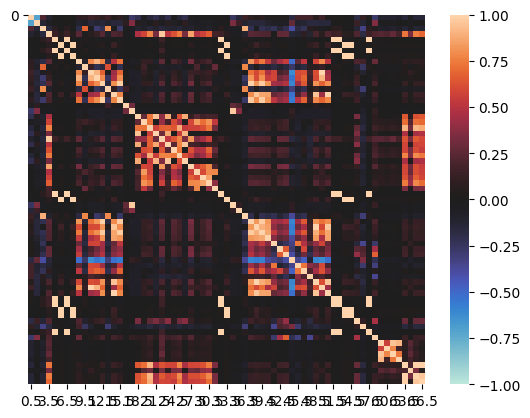

In [38]:
correlation_matrix = df.corr()
correlation_matrix.head()
sn.heatmap(correlation_matrix, vmin=-1, vmax=1, center= 0)

# Возпользуемся Гауссовым Наивным Байессовым классификатором

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score

# Данные

X = df
# Выделяем тестовую и тренировочную выборку (20% тестовой выборки)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state =44)

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)

y_pred_train

y_pred_test = classifier.predict(X_test)
y_pred_test

print('Training-set accuracy score: {0:0.4f}%'. format(accuracy_score(y_train, y_pred_train)*100))
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_pred_test)*100))

Training-set accuracy score: 96.7303%
Model accuracy score: 96.7409%
